## k近傍法(knn)
分類のための機械学習手法\
最近傍のデータをk個とってきて、そのk個のデータが多く所属しているクラスに分類する方法\
kの値を何にするかで分類結果が変わる。
下の図だと、k=1ではクラス１に分類されるがk=3だとクラス２に分類される。\
識別クラスが同数の場合は判断を保留するか、ランダムで振り分ける。

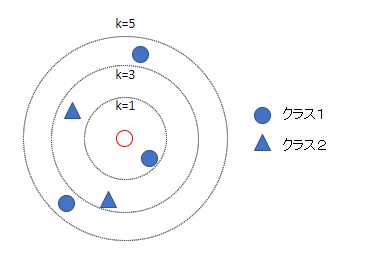

- kの値と決定境界について\
kの値を大きくすると決定境界は滑らかになる。

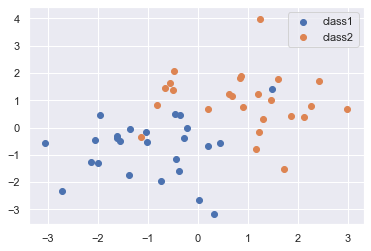

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

X_train, y_train = gen_data()
plt.scatter(X_train[:25,0],X_train[:25,1], label="class1")
plt.scatter(X_train[25:,0],X_train[25:,1], label="class2")
plt.legend(loc="best")
plt.show()

このデータ群をknnで分類したときの決定境界を見てみると、下のグラフのように、kが大きくなるにつれて決定境界が滑らかになる。
また、kが小さいと飛び地のような決定境界になっていることもわかる。

In [46]:
#決定境界を描画する関数
def plt_def_area(X, y, clf):
    xx0, xx1 = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
    xx = np.array([xx0,xx1]).reshape(2,-1).T
    plt.scatter(X_train[:25,0],X_train[:25,1], label="class1")
    plt.scatter(X_train[25:,0],X_train[25:,1], label="class2")
    plt.contourf(xx0, xx1, clf.predict(xx).reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3)) 
    plt.title("k={}".format(knc.get_params()["n_neighbors"]))
    plt.show()

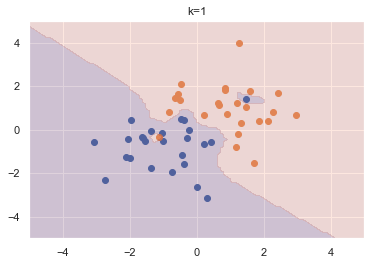

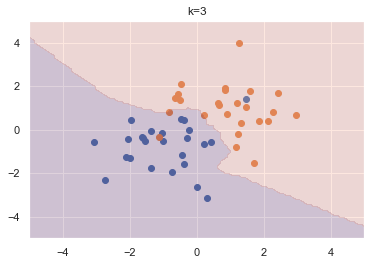

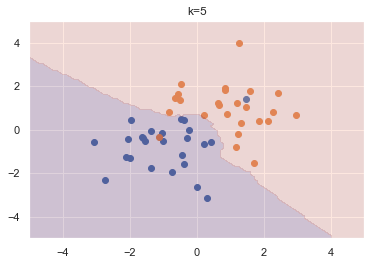

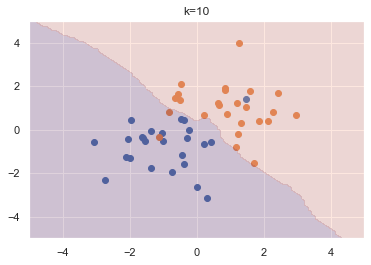

In [63]:
from sklearn.neighbors import KNeighborsClassifier
k_list = [1,3,5,10]
for k in k_list:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    plt_def_area(X_train, y_train, knc)

## k-means
教師なし学習の一種。クラスタリングの手法。
与えられたデータをk個のクラスタに分類する。

- ### k-meansのアルゴリズム
1)各クラスタの中心となる初期値（ベクトル）を設定する\
2)各データについてその中心との距離を計算、最も近いクラスタに割り当てる。\
3)割り当て後の各クラスタの平均ベクトルを求める。\
4)データの割当が収束するまで2,3の手順を繰り返す。

- ### k-meansの距離
 k-meansの距離で用いられるのはユークリッド距離である。\
 一般的な距離の定義としてミンコフスキー距離があり、ユークリッド距離もその一つ。\
 ミンコフスキー距離は次のように定義される。
 $$
  d(x_i, x_j) = \left(\sum_{k=1}^{d} |x_{ik} - x_{jk}|^a \right)^{1/b}
 $$
 
 $a=2, b=2$のとき、ユークリッド距離となる。

## サポートベクターマシン(SVM)
2クラス分類のための機械学習手法。
線形モデルの正負によって分類を行う。
$$
 sign(y) = 
 \left\{
\begin{eqnarray}
+1\ (y>0) \\
-1\ (y<0)
\end{eqnarray}
\right. \quad
$$

$$
 y = \boldsymbol{w}^T \boldsymbol{x} + b
$$

クラスラベルとしては$\{-1,\ 1\}$が出力される

識別境界は
$$
 \boldsymbol{w}^T \boldsymbol{x} + b = 0
$$
となり、各クラスのデータ点の中で、識別関数に近いデータと識別境界の距離（マージン）が最大になるように、パラメータ$\boldsymbol{w}$を求める。

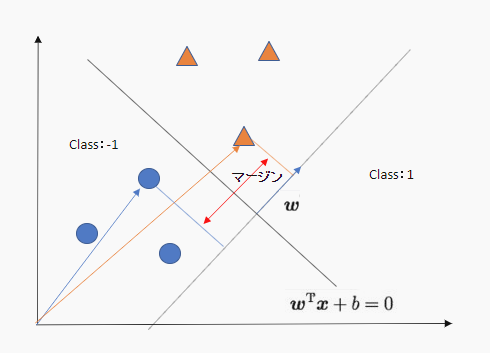

#### - 目的関数の導出

クラス-1のデータうち、最も決定境界に近いデータから境界までの距離は
$$
 \max_{x_i \in C_{t_i} = -1}  \frac{\boldsymbol{w}^T \boldsymbol{x}_i}{||\boldsymbol{w}||}
$$

クラス1のデータうち、最も決定境界に近いデータから境界までの距離は
$$
 \min_{x_i \in C_{t_i} = +1}  \frac{\boldsymbol{w}^T \boldsymbol{x}_i}{||\boldsymbol{w}||}
$$

クラスごとにminとmaxになっているのは、原点から見て、クラス-1は境界の下側にあるため、一番境界に近いデータは$\boldsymbol{w}$への写像後の長さが一番長いものになるからmaxとなっている、クラス１はその反対。

マージン$\rho$は
$$
\begin{eqnarray}
 \rho(w, b) &=&  \min_{x_i \in C_{t_i} = +1}  \frac{\boldsymbol{w}^T \boldsymbol{x}_i}{||\boldsymbol{w}||} - \max_{x_i \in C_{t_i} = -1}  \frac{\boldsymbol{w}^T \boldsymbol{x}_i}{||\boldsymbol{w}||} \\
 &=& \frac{2}{||\boldsymbol{w}||}
\end{eqnarray}
$$

マージンを最大化するつまり、$|w|$を最小化することが最適か問題になる。

今回の問題ではクラスラベル$t_i = -1 \ or\  1$であり、それぞれのクラスに割り当てられる条件は、次のようにまとめられる。
$$
　ｔ_i (\boldsymbol{w}^T \boldsymbol{x}_i + b)  \geq 1
$$

これを制約条件として、
$$
 \min_{w,b} \frac{1}{2} ||\boldsymbol{w}||^2
$$

をラグランジュの未定乗数法で解くことで、最適化する。

#### 制約付き最適化を解く

ラグランジュ関数は
$$
 L(\boldsymbol{w}, b, \boldsymbol{a}) = \frac{1}{2} ||\boldsymbol{w}||^2 - \sum_{i=1}^{n} a_i(t_i(\boldsymbol{w}^T \boldsymbol{x}_i + b) -1)
$$

ここでは,$a_i$がラグランジュ乗数となる。
最小となる$w, b$は、それぞれの変数に対するラグランジュ関数の$w, b$についての偏微分が0となる条件から、
$$
\boldsymbol{w} = \sum_{i=1}^{n} a_i t_i \boldsymbol{x}_i
$$

$$
 \sum_{i=1}^{n} a_i t_i = 0
$$
の二つを満たす。

上記の式を使うと、
$$
 \tilde{L} = \sum_{i=1}^{n} a_i - \frac{1}{2}\sum_{i=1}^{n} \sum_{j=1}^{n}a_i a_j t_i t_j \boldsymbol{x}_i^T \boldsymbol{x}_j
$$

この関数を最大化する$a_i$を求めることで、$w$が求まる。

【補足】
凸計画問題については次の不等式を満たすような$(x^*, \lambda^*)$を鞍点と呼び、その鞍点が最適解を与える。

$$
 L(x, \lambda^*) \le L(x^*, \lambda^*) \le L(x^*, \lambda)
$$

鞍点はxに関して最大、$\lambda$について最小となる点のこと。\
今回の場合、本来求めたい$w, b$を$a_i$で置き換えることで、$a_i$について最小化する問題に置き換えている。もともとの問題のことを主問題、置き換え後の問題を双対問題という（最大化と最小化が入れ替わることに注意）

#### 双対問題
最適化問題は次のようになり、これで得られた$a$から$w, b$を求めることで、元の問題の最適解となる。
$$
\max_a \sum_{i=1}^{n} a_i - \frac{1}{2}\sum_{i=1}^{n} \sum_{j=1}^{n}a_i a_j t_i t_j \boldsymbol{x}_i^T \boldsymbol{x}_j
$$
$$
 \sum_{i=1}^{n} a_i t_i = 0
$$

$$
 a_i \geq 0
$$


### ソフトマージンSVM

上記の最適化の場合、平面でうまく分けられないつまり、線形分離不可のデータに対してうまくいかないことがある。（全データについて制約条件を満たせないことが原因）そこで、誤差（誤分類）を許容したうえで、制約条件を緩めることで分類を行う方法

#### ソフトマージンSVMの目的関数と制約条件

目的関数
$$
 \frac{1}{2} ||w||^2 + C \sum_{i}^{n} \xi_i
$$

制約条件
$$
 t_i (w^T x + b ) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

$\xi$は誤差に対するペナルティ、Cは誤差に対するペナルティを調整する（Cが大きければ誤差を許容しなくなり、Cが小さい場合は例外的なデータは無視され、誤差を許容したパラメータを求める）

### 非線形分離とカーネルトリック

線形分離できない場合に、より高次元の空間にデータを移すことで線形的に分離することが可能な場合がある。\
このときの高次元への変換方法にカーネル法がある。

- カーネルトリック
・ある二つのデータを高次元へ写像した後の内積をスカラー関数を用いて表す方法。

$$
 k(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

よく使われる、カーネル関数としてはガウシアンカーネルがある。
このような手法を用いることで、計算量の削減が可能となる。

### プログラミング実習

### knn(numpy）実装

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
##データの生成
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1,2) - 1
    x1 = np.random.normal(size=50).reshape(-1,2) + 1
    x_train = np.concatenate([x0,x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

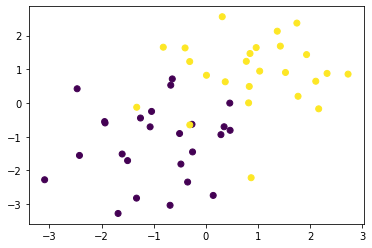

In [7]:
X_train, y_train = gen_data()
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

In [69]:
## 予測
def distance(x1, x2):
    return (np.sum((x1-x2)**2, axis=1))

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearrest_index = distances.argsort()[:n_neighbors] #小さい順に並べてそのインデックスを取得
        mode, _ = stats.mode(y_train[nearrest_index]) #最頻値の取得、_には度数が入る
        y_pred[i] = mode
        
    return y_pred

def plt_result(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

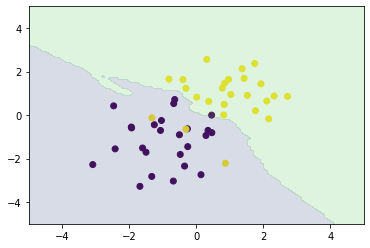

In [73]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, y_train, X_test)
plt_result(X_train, y_train, y_pred)

## kmeans実装

In [76]:
def data_gen():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

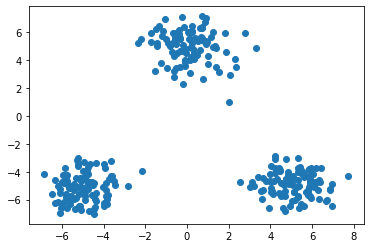

In [77]:
#データ作成
X_train = data_gen()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

In [83]:
def distance(x1,x2):
    return np.sum((x1-x2)**2, axis=1)

n_clusters = 3
iter_max=100

centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)] #中心となるベクトルをランダムで設定

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

In [86]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [87]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

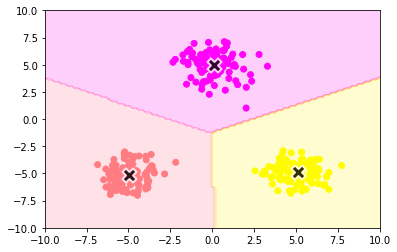

In [88]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

## SVM(線形分離可能）

In [91]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

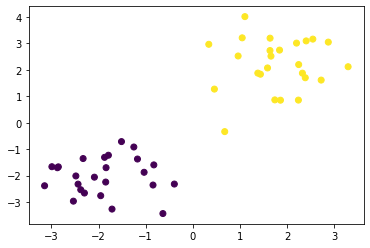

In [92]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [98]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [100]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [101]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

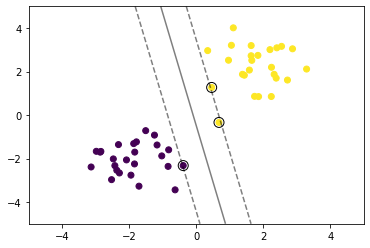

In [105]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                  s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
#plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

## SVM(線形分離不可能）

In [106]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y

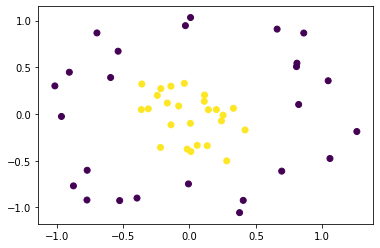

In [107]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [108]:
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [109]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [110]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

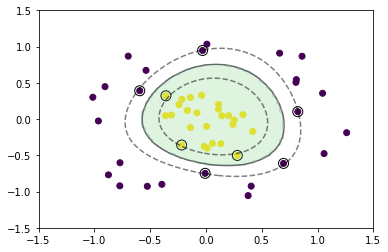

In [111]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])